# Script for brain age prediction using CT data segmentation



### install packages



In [ ]:
!pip install shap
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.2
!pip install numpy==1.20
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import packages

In [ ]:
import os
import matplotlib.pyplot as plt
import scipy
import math
import shap
import pandas as pd
import numpy as np
import sklearn.metrics as m
import seaborn as sns
from pycaret.regression import *
from google.colab import files

### Import data
For data request, contact us
artur.marques@einstein.br


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EINSTEIN/base_norm/data.csv',na_values='na',delimiter=',')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

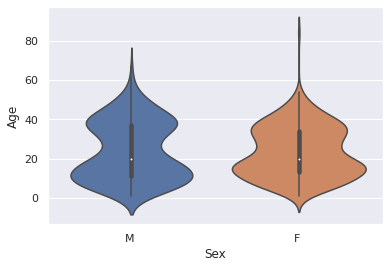

In [ ]:
# printing age by sex
sns.set(style="darkgrid")
df["Sex"]=df["patient_sex"]
df["Age"]=df["age"]
ax=sns.violinplot(x=df["Sex"], y=df["Age"])


In [ ]:
#replacing F and M by 1 and 0
df['sex'] =0
df.loc[df.patient_sex == 'F ', 'sex'] = 1
df.drop('patient_sex',1,inplace=True)

In [ ]:
#getting estimated brain volume and ratio between variables
df['estimated_brain_vol']=df['liquor_cm3']+df['white_matter_cm3']+df['gray_matter_cm3']
df['gray_norm']=df['estimated_brain_vol']/df['gray_matter_cm3']
df['white_norm']=df['estimated_brain_vol']/df['white_matter_cm3']
df['liquor_norm']=df['estimated_brain_vol']/df['liquor_cm3']
df['bone_norm']=df['estimated_brain_vol']/df['bone_cm3']
df['soft_norm']= df['estimated_brain_vol']/df['soft_tissue_cm3']
df['gray_white_matter']=df['gray_norm']/df['white_norm']
df['soft_tissue_gray']=df['soft_norm']/df['gray_norm']
df['liquor_white_matter']=df['white_norm']/df['liquor_norm']
df['liquor_gray_matter']=df['gray_norm']/df['liquor_norm']
df['bone_gray_matter']=df['bone_norm']/df['gray_norm']
df['bone_white_matter']=df['bone_norm']/df['white_norm']
df['soft_tissue_white']=df['soft_norm']/df['white_norm'] 


In [ ]:
# dropping absolute values and keep the normalized ones
list_drop = [ 'index','gray_matter_cm3', 'white_matter_cm3', 'liquor_cm3', 'bone_cm3', 'soft_tissue_cm3','background_cm3','patient_ID']
df = df.drop(list_drop,1)


In [ ]:
df.columns=['Age','Sex','Estimated intracranial volume','Gray matter volume','White matter volume','Cerebrospinal fluid','Bone volume','Soft tissue volume','Gray matter and white matter ratio', 'Soft tissue and gray matter ratio',
           'Cerebrospinal fluid and white matter ratio','Cerebrospinal fluid and gray matter ratio', 'Bone and gray matter ratio', 'Bone and white matter ratio','Soft tissue and white matter ratio']


In [ ]:
df.columns=['Idade','Sexo','Volume intracraniano estimado','Volume Substância cinzenta','Volume substância branca','Líquido cefalorraquidiano','Volume do osso','Volume dos tecidos moles','Razão entre subsância cinzenta e branca', ' Razão tecidos moles e substância cinzenta',
           'Razão entre liquido cefalorraquidiano e subs. branca','Razão entre liquido cefalorraquidiano e subs. cinzenta', 'Razão do osso e subs. cinzenta', 'Razão do osso e substância branca','Razão de tecidos moles e subs. branca']

In [ ]:

drop_sex= df[df['Sex']==0].index.tolist()
dfm= df.drop(df.index[drop_sex], axis=0)
dfm=dfm.drop(['Sex'],1)

#   Creating dataframe for females
drop_sex= df[df['Sex']==1].index.tolist()
dff= df.drop(df.index[drop_sex], axis=0)
dff=dff.drop(['Sex'],1)


### Model for females

In [ ]:
#model for females
model_f = setup (data = dff, target = 'Age', train_size = 0.7, data_split_shuffle=True,session_id=42)
model_females= compare_models(sort = 'MAE')

In [ ]:
X_test_f = get_config('X_test')
y_test_f= get_config('y_test')

model_females= create_model('et')
p_fs=model_females.predict(X_test_f)
plot_model(model_females,"feature")

### Model for males

In [ ]:
model_m = setup (data = dfm, target = 'Age', train_size = 0.7, data_split_shuffle=True, session_id=42)
best_model= compare_models(sort = 'MAE')

In [ ]:
X_test_m = get_config('X_test')
y_test_m= get_config('y_test')

model_males= create_model('et')
p_m=model_male.predict(X_test_m)
plot_model(model_males,"feature")


Text(0, 0.5, 'Age gap')

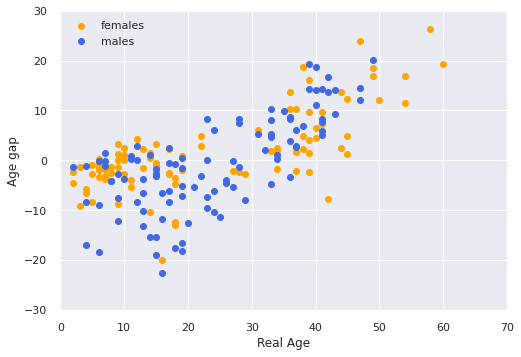

In [ ]:
gapm= (y_test_m)-(p_males)
gapf= (y_test_f)-(p_fs)


#plottig graphs
plt.scatter(y_test_f,gapf,color=['orange'],label='females')
plt.scatter(y_test_m,gapm,color=['royalblue'],label='males')
plt.legend()
plt.xlim(0, 70)
plt.ylim(-30, 30)
plt.xlabel('Real Age')
plt.ylabel('Age gap')

In [ ]:
#test wether residuals are normal and different between one another
scipy.stats.shapiro(gapm)
scipy.stats.shapiro(gapm)
scipy.stats.mannwhitneyu(gapf,gapm)

MannwhitneyuResult(statistic=4420.0, pvalue=0.06341922977576561)

### Plot model for both sexes


In [ ]:
model = setup (data = df, target = 'Age', train_size = 0.7, data_split_shuffle=True, session_id=42)
best_model_all= compare_models( sort='MAE')

In [ ]:
model = create_model('et')
X_test = get_config('X_test')
X_train = get_config('X_train')
y_train = get_config('y_train')

model.fit(X_train,y_train)


In [ ]:

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

Permutation explainer: 201it [02:28,  1.29it/s]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

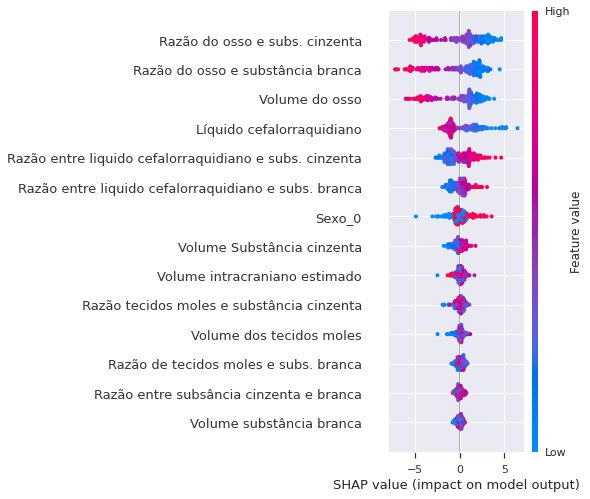

In [ ]:

shap.summary_plot(shap_values,show=False)

fig=plt.savefig("shap_values_mixed_portugues.pdf")
files.download("shap_values_mixed_portugues.pdf")